# Plot power vs. rotor speed for all turbines

In [ ]:
"""Plot power vs. rotor speed for all turbines

"""

In [1]:
# import libraries
import pandas as pd
import itertools

In [2]:
# create dataframe from CSV
df = pd.read_csv('data/SCADA_merged.csv', skip_blank_lines=True)

In [3]:
# create pivot table (new dataframe)
power = pd.pivot_table(
    df, index=['rs_av'], columns=['turbine'], values=['ap_av'])

In [4]:
# removing pivot table values name from heading
power.columns = power.columns.droplevel(0)

In [5]:
# list of column headers (i.e., turbines 1 to 25)
list1 = power.columns.tolist()

In [6]:
# create new list for individual subplot titles
list2 = [
    'Average active power vs. rotor speed for turbine %s' % x for x in list1]

In [7]:
# rename index
power.index.name = 'Rotor speed (rpm)'

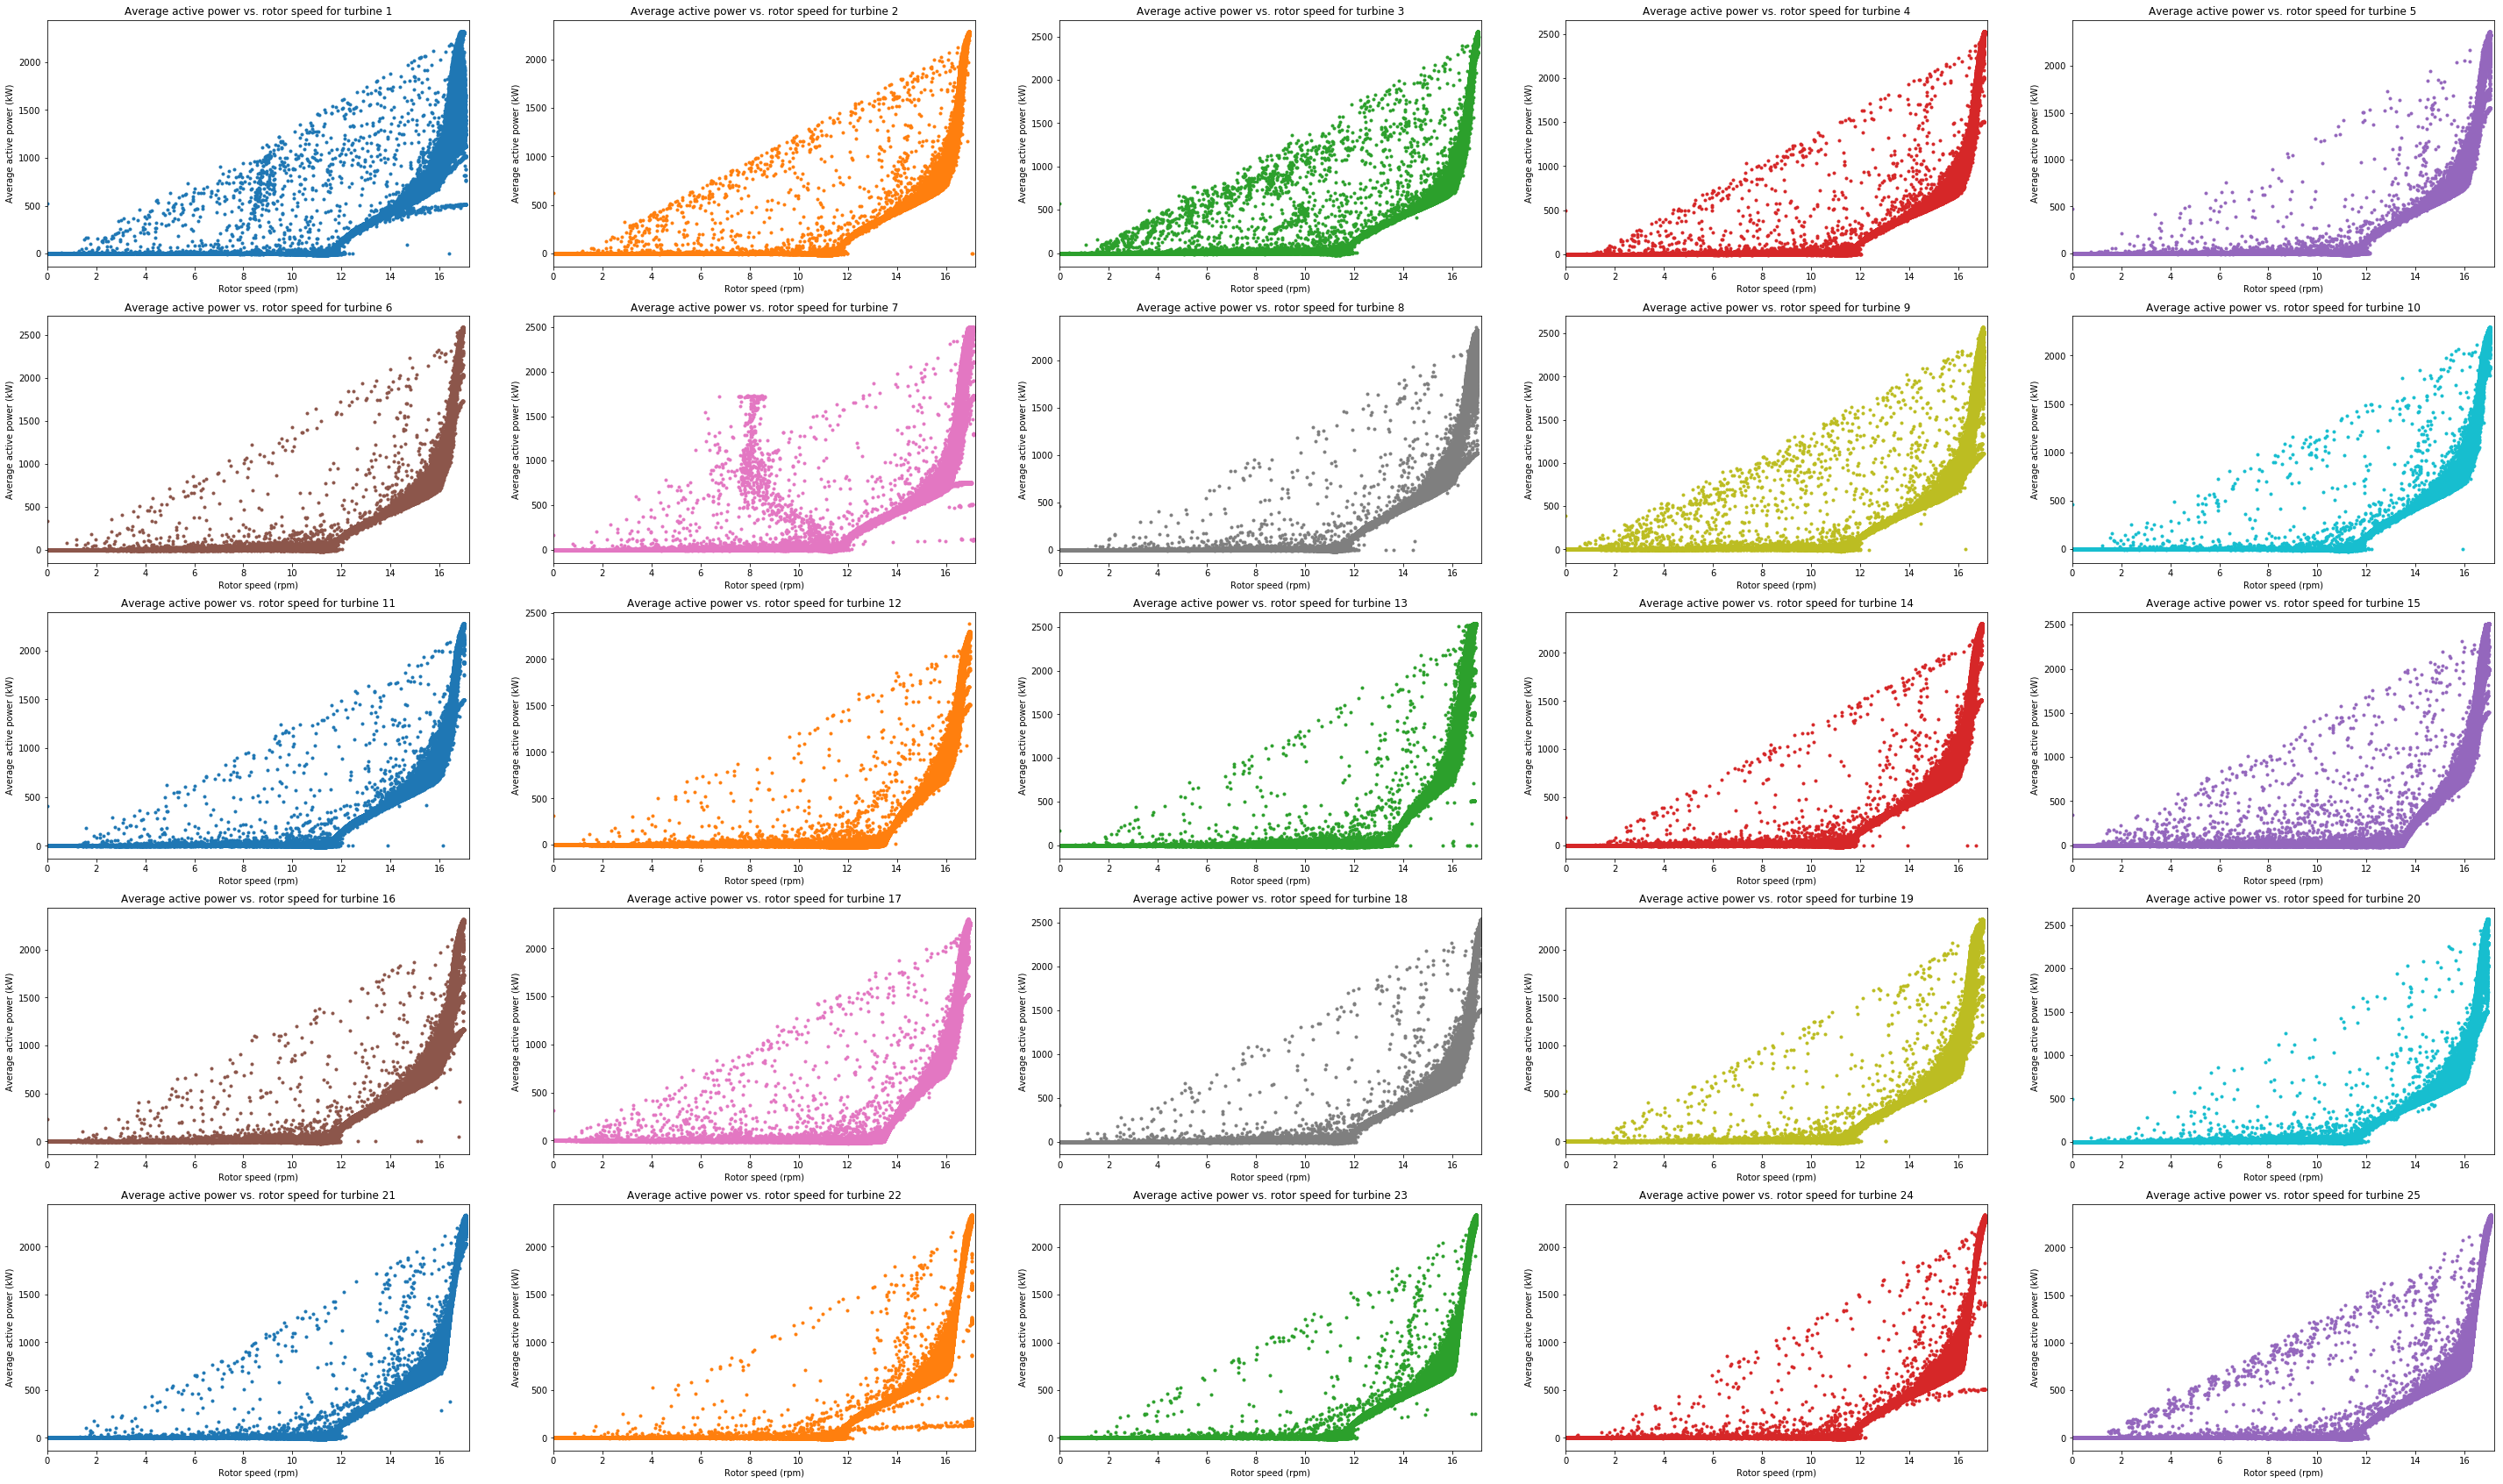

In [8]:
# plotting all columns (i.e., turbines 1 to 25) in the same figure
ax = power.plot(
    subplots=True, figsize=(50, 30), layout=(5, 5),
    style='.', sharex=False, title=list2, legend=False)
list3 = list(range(0, 5))
list4 = list(itertools.product(list3, list3))
for (x, y) in list4:
    ax[x][y].set_ylabel('Average active power (kW)')